In [ ]:
# 데이터 생성
# 8000 sr, 0.5배 ~ 1.5배

In [5]:
# 임포트
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from scipy.fftpack import fft, ifft
import IPython
import os
import numpy as np
import librosa, librosa.display
import random

%matplotlib inline

In [128]:
# 데이터 로드

base_path = './data/example/'

files = ['zero.wav', 'one.wav', 'two.wav', 'three.wav', 'four.wav', 'five.wav', 'six.wav', 'seven.wav', 'eight.wav', 'nine.wav']

# { "zero.wav": {"sample_rate": 8000, "samples": [...]},
#   "one.wav": {"sample_rate": 8000, "samples": [...]},
#   ...
#   "nine.wav": {"sample_rate": 8000, "samples": [...]}}

# 샘플 데이터 저장하는 법을 변경했습니다
sample_list = np.array([])
for f in files:
    wf = wavfile.read(base_path + f)
    assert wf[0] == 8000, "sampling rate must be 8000" # 샘플링 레이트는 무조건 8000이여야 합니다.
    sample_list.append(wavfile.read(base_path + f)[1])

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [122]:
# raw_wav_data -> npy data
raw_data = []
for s in sample_list:
    raw_data.append(s)
    
raw_data = np.asarray(raw_data)
np.save("raw_data.npy", raw_data)

raw_label = np.arange(10)
np.save("raw_label.npy", raw_label)


In [126]:
np.asarray(sample_list)

array([array([  -5,  126,   65, ..., -172,  -78,  -21], dtype=int16),
       array([ -25,   19,   75, ..., -190, -162, -127], dtype=int16),
       array([-21, -46, -64, ...,  20,   6, -16], dtype=int16),
       array([-117,  -98, -116, ..., -135,  -91,  -99], dtype=int16),
       array([-183,  -76, -142, ...,   22,   27,   27], dtype=int16),
       array([ 35,  -3, -44, ..., -15,  -2, -15], dtype=int16),
       array([ -85,  -66,  -55, ...,  -84, -106,  -80], dtype=int16),
       array([ 331,  241,  188, ...,  -46,  -81, -140], dtype=int16),
       array([317, 368, 393, ...,  14,   5, -71], dtype=int16),
       array([126, 155, 145, ..., -92, -81, -81], dtype=int16)],
      dtype=object)

In [21]:
start_ratio = 0.5
ratio_width = 0.1
end_ratio = 1.5
random_per_number = 3 
sample_length = 4000

# 0 ~ 9
# 0.5 ~ 1.5
# random = 3개
# 총 데이터 크기 4000

# TODO: 
new_data = []

for s in sample_list:
    for r in np.arange(start_ratio, end_ratio, ratio_width):
        for i in range(random_per_number):
            a = np.zeros((sample_length))

            
            start = random.randrange(sample_length - len(s))
            end = start + len(s)
            
            a[start:end] = s * r
            
            new_data.append(a)

In [121]:
new_data = np.asarray(new_data)
new_data.shape

(300, 4000)

In [34]:
np.save("new_data.npy", new_data)

In [37]:
new_label = []
for i in range(10):
    new_label.extend([i] * 30)

In [42]:
new_label = np.array(new_label)
new_label.shape

(300,)

In [43]:
np.save("new_label.npy", new_label)

In [49]:
def stft_sum(x):
    D = np.abs(librosa.stft(x, dtype='float32', 
                            hop_length=100, 
                            win_length=100))
    a = D.sum(axis=1)
    return a


In [47]:
new_data[8]

array([0., 0., 0., ..., 0., 0., 0.])

/home/user/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:184: ComplexWarning: Casting complex values to real discards the imaginary part
  axis=0)[:stft_matrix.shape[0]]


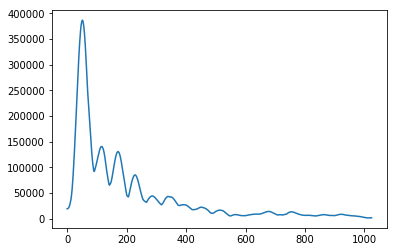

In [114]:
plt.plot(stft_sum(new_data[0]))

In [70]:
def normalization(x):
    return (x - x.min()) / (x.max() - x.min()) - 0.5

In [95]:
#정규화1 : 가장 큰값을 가지는 수로 전체를 나누어 줌
"""
#공백 리스트
normal_file = list()

#sample_dict를 복사함
normaldict=dict(sample_dict)

for i in files:
    x_n = sample_dict[i]['samples']

    print("원래의 데이터")
    print(x_n)

    #기존 데이터의 길이
    length = len(x_n)

    temp_absmax = 0
    temp_max = 0
    temp_min = 0

    #처음부터 끝가지 반복문을 돌며 최대값을 찾아줌
    for j in range(0,length):

        #최대값이 양수일때
        temp_max = np.maximum(sample_dict[i]['samples'][j],temp_max)

        #최대값이 음수일때
        temp_min = np.minimum(sample_dict[i]['samples'][j],temp_min)

        #최대 양수 최소 음수의 절대값을 비교하여 가장큰 절대값을 찾아줌
        temp_absmax = np.maximum(temp_max, abs(temp_min))

        #반복문을 돌며 가장큰 절대값으로 나누어주며 list에 추가
        for j in range(0,length):
        normal_file.append(sample_dict[i]['samples'][j]/ temp_absmax)

        print()
        print("정규화된 데이터")
        print(normal_file)
        print()

        #normaldict에 업데이트
        normaldict.update({i:{'sample_rate':8000, 'samples':normal_file}})

        #리스트 초기화
        normal_file = list()

#값이 들어갔는지 확인
print(normaldict)
"""
# { "zero.wav": {"sample_rate": 8000, "samples": [...]},

def normalization_2(x):
    x_n = x

    #print("원래의 데이터")
    #print(x_n)

    #기존 데이터의 길이
    length = len(x_n)

    temp_absmax = 0
    temp_max = x[0]
    temp_min = x[0]

    #처음부터 끝가지 반복문을 돌며 최대값을 찾아줌
    for j in range(0, length):
        #리스트 초기화
        norm_file = list()
        
        #최대값이 양수일때
        temp_max = np.maximum(x[j], temp_max)

        #최대값이 음수일때
        temp_min = np.minimum(x[j], temp_min)

        #최대 양수 최소 음수의 절대값을 비교하여 가장큰 절대값을 찾아줌
        temp_absmax = np.maximum(temp_max, abs(temp_min))

    #반복문을 돌며 가장큰 절대값으로 나누어주며 list에 추가            

    norm_file = x / temp_absmax

        #print()
        #print("정규화된 데이터")
        #print(normal_file)
        #print()
    return norm_file        

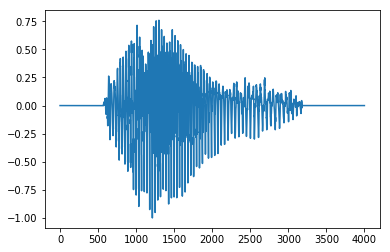

In [96]:
plt.plot(normalization_2(new_data[1]))

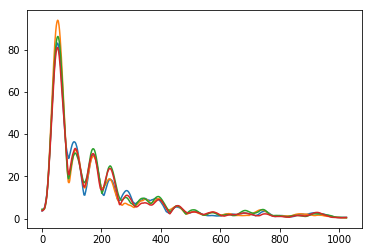

In [115]:
plt.plot(stft_sum(normalization_2(new_data[1])))
plt.plot(stft_sum(normalization_2(new_data[10])))
plt.plot(stft_sum(normalization_2(new_data[20])))
plt.plot(stft_sum(normalization_2(new_data[29])))

In [109]:
def smooth(x):
    x_ = []
    
    x_.append(x[0])
    
    for i in range(1, len(x)):
        half = (x[i -1] + x[i]) / 2
        x_.append(half)
        
    return x_

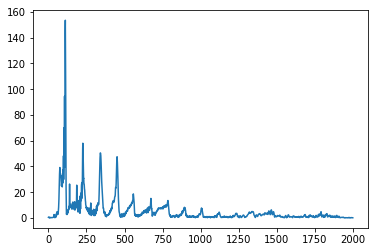

In [110]:
fft_value = np.abs(fft(normalization_2(new_data[20])))
plt.plot(smooth(fft_value[:len(fft_value) // 2]))

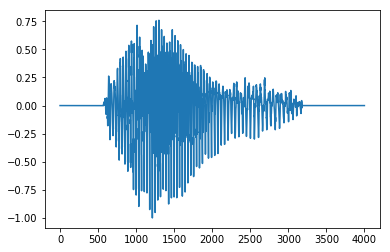

In [99]:
plt.plot(normalization_2(new_data[1]))